## About Dataset

This dataset focuses on air quality assessment across various regions. The dataset contains 5000 samples and captures critical environmental and demographic factors that influence pollution levels.

Key Features:

*Temperature (°C): Average temperature of the region.

*Humidity (%): Relative humidity recorded in the region.

*PM2.5 Concentration (µg/m³): Fine particulate matter levels.

*PM10 Concentration (µg/m³): Coarse particulate matter levels.

*NO2 Concentration (ppb): Nitrogen dioxide levels.

*SO2 Concentration (ppb): Sulfur dioxide levels.

*CO Concentration (ppm): Carbon monoxide levels.

*Proximity to Industrial Areas (km): Distance to the nearest industrial zone.

*Population Density (people/km²): Number of people per square kilometer in the region.

**Target Variable: Air Quality Levels

1. Good: Clean air with low pollution levels.
2. Moderate: Acceptable air quality but with some pollutants present.
3. Poor: Noticeable pollution that may cause health issues for sensitive groups.
4. Hazardous: Highly polluted air posing serious health risks to the population.

## Predicting Air Quality Using Machine Learning

we are going to take a following approach 
1. Problem Definition
2. Data
3. Evaluation
4. Modelling
5. Experimentation

In [2]:
# import all tools we need

# Data Analysis and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Model for scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
# import dataset
df = pd.read_csv("../../../dataset/updated_pollution_dataset.csv")
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [21]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [23]:
df.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [24]:
df['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [25]:
# encoding target value category into numbers
custom_mapping = {'Moderate':0, 'Good':1, 'Hazardous':2, 'Poor':3 }

df['Air Quality'] = df['Air Quality'].map(custom_mapping)
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,0
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,0
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,0
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,2
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,0
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,0
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,1


In [26]:
df['Air Quality'].value_counts()

Air Quality
1    2000
0    1500
3    1000
2     500
Name: count, dtype: int64

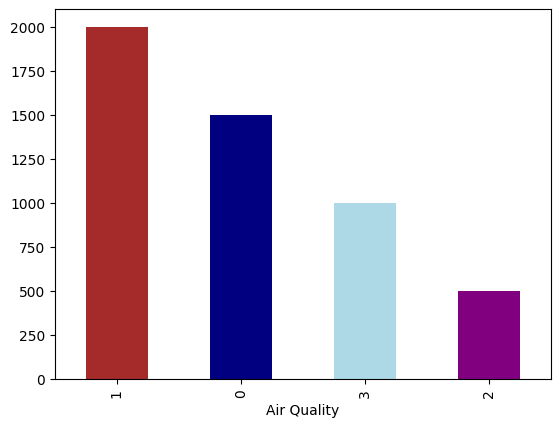

In [27]:
# Let's visual the target value
df['Air Quality'].value_counts().plot(kind="bar", color=["brown", "navy", "lightblue", "purple"]);